# ベクトル場の描画

matplotlib.pyplot によってベクトル場の描画を行います．

matplotlib.pyplotの各関数の詳細については，matplotlibのマニュアルを参照してください．

In [1]:
import numpy as np
import matplotlib.pyplot as plt

*****
### 回転

> ${\bf A} =
\left(\begin{array}{c}
\cos{\frac{\pi}{6}} & -\sin{\frac{\pi}{6}} \\
\sin{\frac{\pi}{6}} &  \cos{\frac{\pi}{6}} \\
\end{array}\right)
=
\left(\begin{array}{c}
\frac{\sqrt{3}}{2} & -\frac{1}{2} \\
\frac{1}{2} &  \frac{\sqrt{3}}{2} \\
\end{array}\right)
\approx
\left(\begin{array}{c}
0.866 & -0.5 \\
0.5 & 0.866 \\
\end{array}\right)
$

In [2]:
theta = np.pi/6
A = np.array([[np.cos(theta),-np.sin(theta)],
              [np.sin(theta),np.cos(theta)]])
A

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [3]:
xEdge = 5
yEdge = 5
pitch = 0.2
X,Y = np.meshgrid(np.arange(-xEdge,xEdge,pitch), np.arange(-yEdge,yEdge,pitch))
U = A[0,0]*X+A[0,1]*Y - X
V = A[1,0]*X+A[1,1]*Y - Y

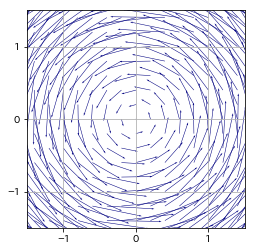

In [4]:
plt.axis('scaled')
plt.quiver(X,Y,U,V,color='navy',angles='xy',scale_units='xy',scale=1)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.grid()
plt.draw()
plt.show()

固有値を求めます．

In [5]:
eigvals,eigvecs = np.linalg.eig(A)

In [6]:
eigvals

array([ 0.8660254+0.5j,  0.8660254-0.5j])

In [7]:
eigvecs

array([[ 0.70710678+0.j        ,  0.70710678-0.j        ],
       [ 0.00000000-0.70710678j,  0.00000000+0.70710678j]])

In [8]:
eigvecs[:,0]/0.70710678

array([ 1.+0.j,  0.-1.j])

In [9]:
eigvecs[:,1]/0.70710678

array([ 1.-0.j,  0.+1.j])

*****
### 2方向に伸びる変換

> ${\bf A} =
\left(\begin{array}{c}
1.8 & 0.6 \\
0.6 & 1.8 \\
\end{array}\right)$

- 固有値：$2.4$, 固有ベクトル：$\left(\begin{array}{c} 1 \\  1  \end{array}\right)$
- 固有値：$1.2$, 固有ベクトル：$\left(\begin{array}{c} 1 \\ -1  \end{array}\right)$

In [10]:
T = np.array([[2.4,0],
              [0,1.2]])
R = np.array([[np.cos(np.pi/4),-np.sin(np.pi/4)],
              [np.sin(np.pi/4), np.cos(np.pi/4)]])
A = R.dot(T.dot(np.linalg.inv(R)))
A

array([[ 1.8,  0.6],
       [ 0.6,  1.8]])

In [11]:
xEdge = 5
yEdge = 5
pitch = 0.2
X,Y = np.meshgrid(np.arange(-xEdge,xEdge,pitch), np.arange(-yEdge,yEdge,pitch))
U = A[0,0]*X+A[0,1]*Y - X
V = A[1,0]*X+A[1,1]*Y - Y
theta = 2*np.pi*np.array(range(0,100))/100
cx = A[0,0]*np.cos(theta)+A[0,1]*np.sin(theta)
cy = A[1,0]*np.cos(theta)+A[1,1]*np.sin(theta)

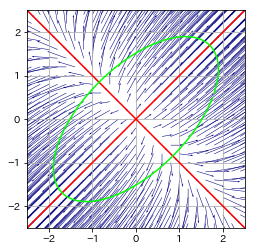

In [12]:
plt.axis('scaled')
plt.quiver(X,Y,U,V,color='navy',angles='xy',scale_units='xy',scale=1)
plt.plot([-3,3],[3,-3],color='red')
plt.plot([-3,3],[-3,3],color='red')
plt.plot(cx,cy,color='lime')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.grid()
plt.draw()
plt.show()

固有値を求めます．

In [13]:
eigvals,eigvecs = np.linalg.eig(A)

In [14]:
eigvals

array([ 2.4,  1.2])

In [15]:
eigvecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [16]:
eigvecs[:,0]/0.70710678

array([ 1.,  1.])

In [17]:
eigvecs[:,1]/-0.70710678

array([ 1., -1.])

*****
### 縮小と伸長が混在する変換

> ${\bf A} =
\left(\begin{array}{c}
1 & -\frac{3}{4} \\
-\frac{3}{4} & \frac{17}{8} \\
\end{array}\right)$

- 固有値：$\frac{5}{8}$, 固有ベクトル：$\left(\begin{array}{c} 2 \\  1  \end{array}\right)$
- 固有値：$\frac{5}{2}$, 固有ベクトル：$\left(\begin{array}{c} 1 \\ -2  \end{array}\right)$

In [18]:
A = np.array([[1,-3/4],
              [-3/4,17/8]])
A

array([[ 1.   , -0.75 ],
       [-0.75 ,  2.125]])

In [19]:
xEdge = 5
yEdge = 5
pitch = 0.2
X,Y = np.meshgrid(np.arange(-xEdge,xEdge,pitch), np.arange(-yEdge,yEdge,pitch))
U = A[0,0]*X+A[0,1]*Y - X
V = A[1,0]*X+A[1,1]*Y - Y
theta = 2*np.pi*np.array(range(0,100))/100
cx = A[0,0]*np.cos(theta)+A[0,1]*np.sin(theta)
cy = A[1,0]*np.cos(theta)+A[1,1]*np.sin(theta)

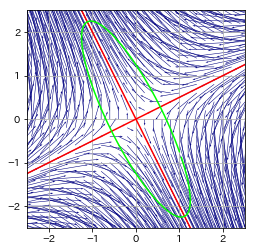

In [20]:
plt.axis('scaled')
plt.quiver(X,Y,U,V,color='navy',angles='xy',scale_units='xy',scale=1)
plt.plot([-4,4],[-2,2],color='red')
plt.plot([-2,2],[4,-4],color='red')
plt.plot(cx,cy,color='lime')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.grid()
plt.draw()
plt.show()

固有値を求めます．

In [21]:
eigvals,eigvecs = np.linalg.eig(A)

In [22]:
eigvals

array([ 0.625,  2.5  ])

In [23]:
eigvecs

array([[-0.89442719,  0.4472136 ],
       [-0.4472136 , -0.89442719]])

In [24]:
eigvecs[:,0]/-0.447213595

array([ 2.,  1.])

In [25]:
eigvecs[:,1]/0.447213595

array([ 1., -2.])

*****
### 直交しない2方向に伸びる変換

> ${\bf A} =
\left(\begin{array}{c}
\frac{5}{3} & -\frac{2}{3} \\
-\frac{2}{3} & \frac{10}{3} \\
\end{array}\right)$

- 固有値：$2$, 固有ベクトル：$\left(\begin{array}{c} 2 \\ 1  \end{array}\right)$
- 固有値：$3$, 固有ベクトル：$\left(\begin{array}{c} 1 \\ 2  \end{array}\right)$

In [26]:
A = np.array([[5/3,2/3],
              [-2/3,10/3]])
A

array([[ 1.66666667,  0.66666667],
       [-0.66666667,  3.33333333]])

In [27]:
xEdge = 5
yEdge = 5
pitch = 0.2
X,Y = np.meshgrid(np.arange(-xEdge,xEdge,pitch), np.arange(-yEdge,yEdge,pitch))
U = A[0,0]*X+A[0,1]*Y - X
V = A[1,0]*X+A[1,1]*Y - Y
theta = 2*np.pi*np.array(range(0,100))/100
cx = A[0,0]*np.cos(theta)+A[0,1]*np.sin(theta)
cy = A[1,0]*np.cos(theta)+A[1,1]*np.sin(theta)

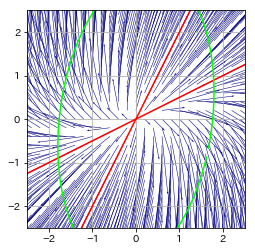

In [28]:
plt.axis('scaled')
plt.quiver(X,Y,U,V,color='navy',angles='xy',scale_units='xy',scale=1)
plt.plot([-4,4],[-2,2],color='red')
plt.plot([-2,2],[-4,4],color='red')
plt.plot(cx,cy,color='lime')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.grid()
plt.draw()
plt.show()

固有値を求めます．

In [29]:
eigvals,eigvecs = np.linalg.eig(A)

In [30]:
eigvals

array([ 2.,  3.])

In [31]:
eigvecs

array([[-0.89442719, -0.4472136 ],
       [-0.4472136 , -0.89442719]])

In [32]:
eigvecs[:,0]/-0.447213595

array([ 2.,  1.])

In [33]:
eigvecs[:,1]/-0.447213595

array([ 1.,  2.])

*****